In [1]:
from __future__ import division
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns

In [2]:
data = pd.read_csv('./data/tra_from_master.csv')
data.head()

,Unnamed: 0,EC Filename,Wrapper Name,Kmer Size,Read - TP,Read - TN,Read - FN,Read - FN WRONG,Read - FP,Read - FP INDEL,...,Tool,Coverage,Length,Base Sensitivity,Base Precision,Base Gain,Base Accuracy,Dataset,Trim Percent,Trim Effeciency
0,19,bfc_TRA.rep.seq_sim_rl_100_cov_1_1_18.correcte...,run.bfc.sh,18,983,739,3707,3,174,0,...,Bfc,1,100L,0.265148,0.878538,0.228490,0.984513,TRA,0.0,NaN
1,20,bfc_TRA.rep.seq_sim_rl_100_cov_2_1_18.correcte...,run.bfc.sh,18,1708,1631,8514,4,241,0,...,Bfc,2,100L,0.206757,0.886846,0.180377,0.983704,TRA,0.0,NaN
2,21,bfc_TRA.rep.seq_sim_rl_100_cov_4_1_18.correcte...,run.bfc.sh,18,2485,3096,18409,7,223,0,...,Bfc,4,100L,0.136898,0.932641,0.127011,0.982495,TRA,0.0,NaN
3,22,bfc_TRA.rep.seq_sim_rl_100_cov_1_1_19.correcte...,run.bfc.sh,19,1360,747,3384,3,112,0,...,Bfc,1,100L,0.319423,0.921458,0.292197,0.985790,TRA,0.0,NaN
4,23,bfc_TRA.rep.seq_sim_rl_100_cov_2_1_19.correcte...,run.bfc.sh,19,2296,1638,8039,2,123,0,...,Bfc,2,100L,0.244905,0.952597,0.232718,0.984745,TRA,0.0,NaN


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


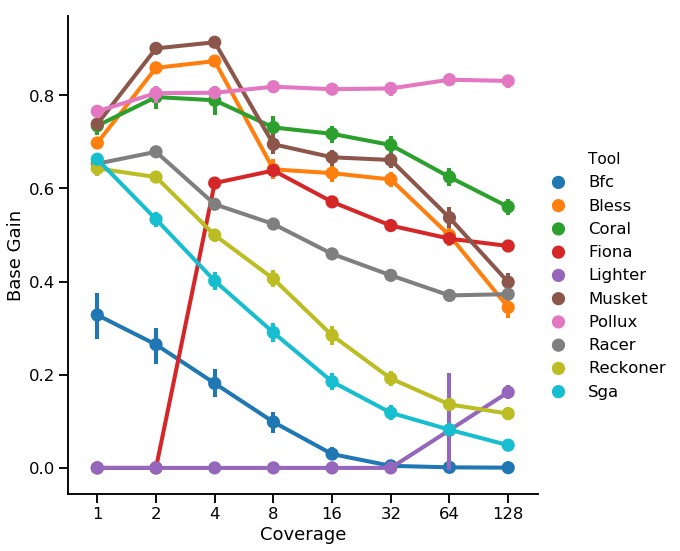

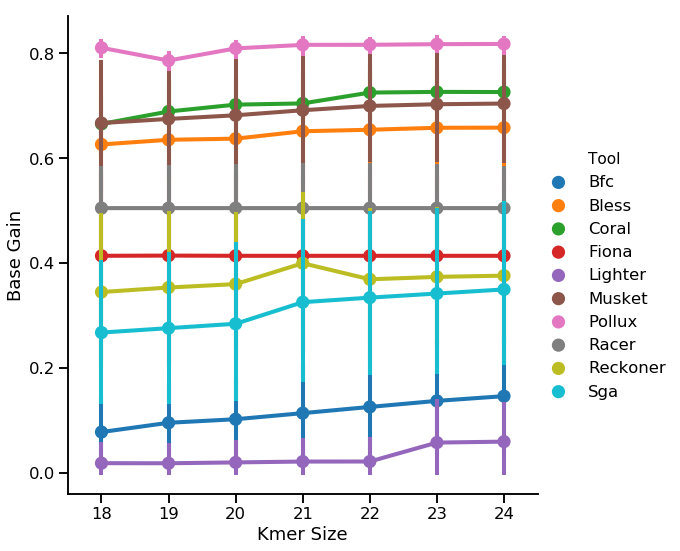

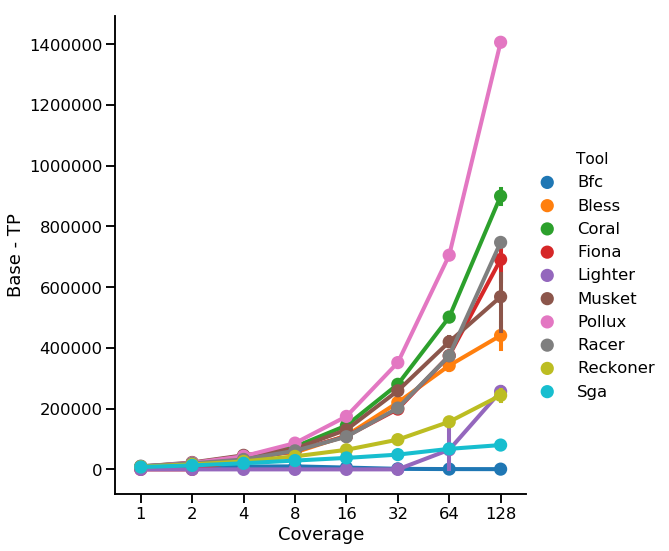

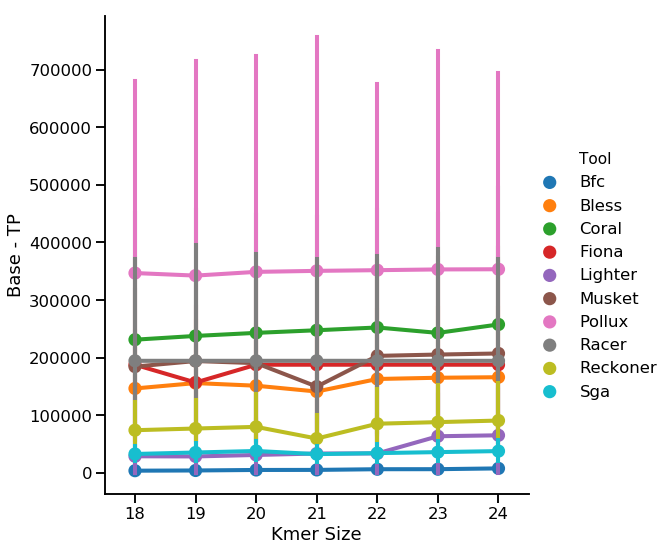

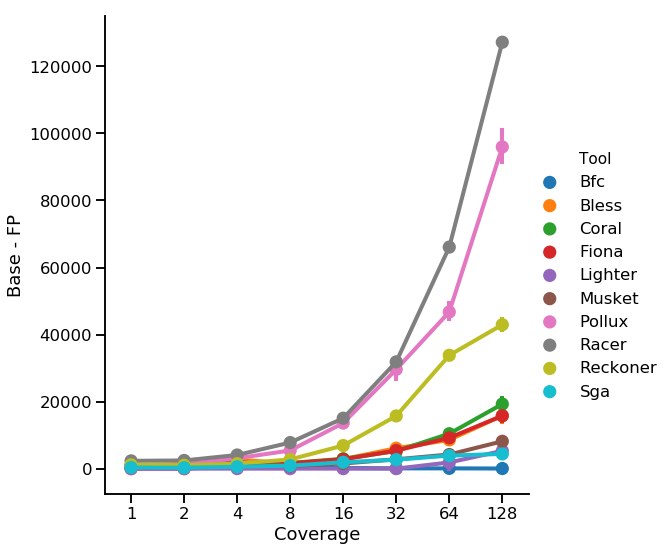

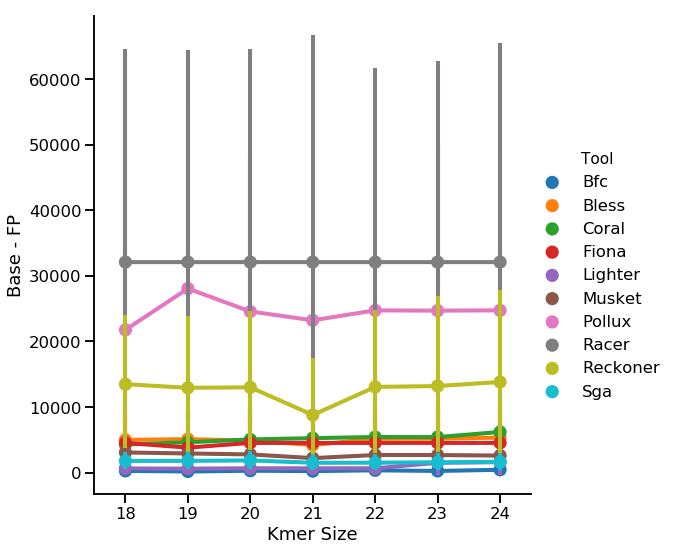

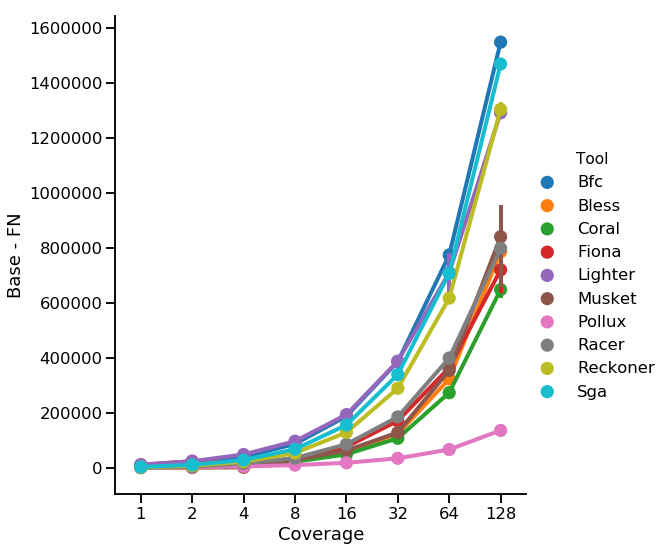

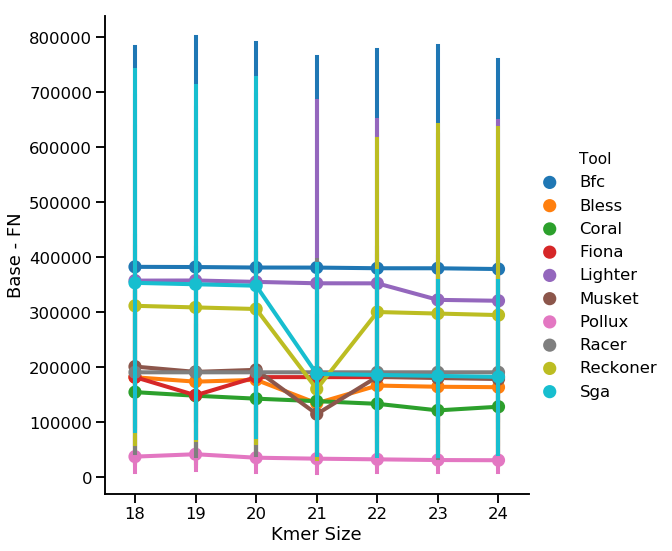

In [6]:
# for i in ["Base Accuracy", "Base Gain", "Base Sensitivity", "Base Precision"]:
for i in ["Base Gain", "Base - TP", "Base - FP", "Base - FN"]:
    sns.set_context('talk')
    g = sns.catplot(x="Coverage", y=i,
                 hue="Tool", kind='point', height=8, aspect=1,
                 data=data)
    g = sns.catplot(x="Kmer Size", y=i,
                 hue="Tool", kind='point', height=8, aspect=1,
                 data=data) # no bars 
    
    ax = sns.regplot(x="x", y="y", data=ans.loc[ans.dataset == "III"],
                  scatter_kws={"s": 80},
                  robust=True, ci=None)

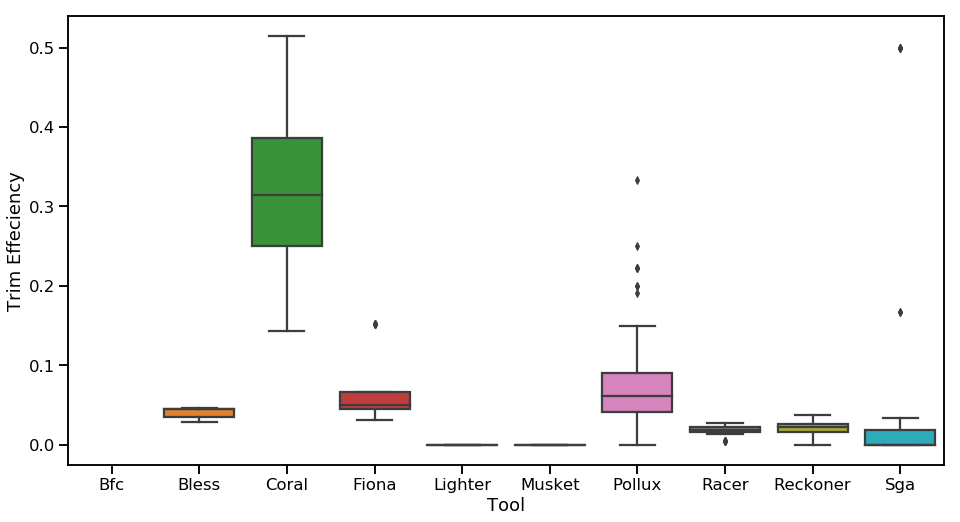

In [7]:
sns.set_context('talk')
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_context('talk')
sns.boxplot(ax=ax, y="Trim Effeciency", x="Tool",
             data=data)

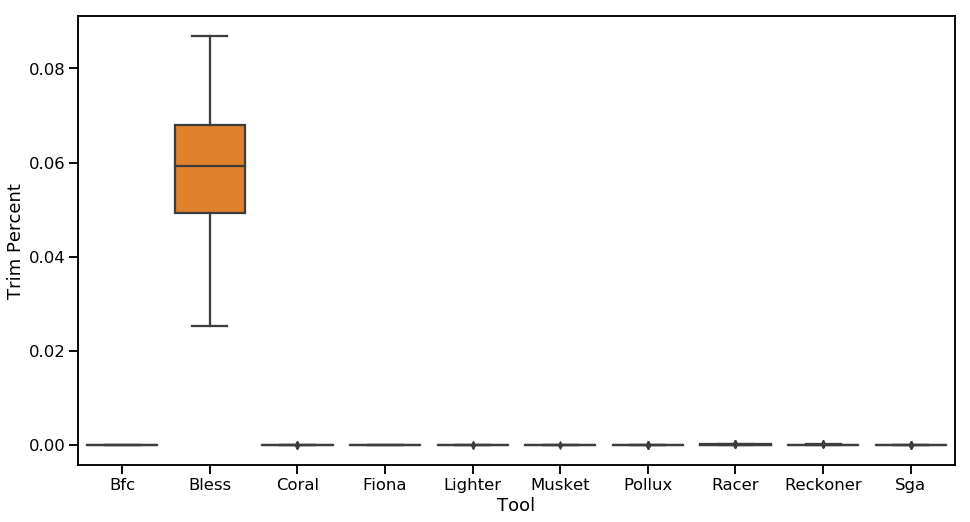

In [8]:
sns.set_context('talk')
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_context('talk')
sns.boxplot(ax=ax, y="Trim Percent", x="Tool",
             data=data)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


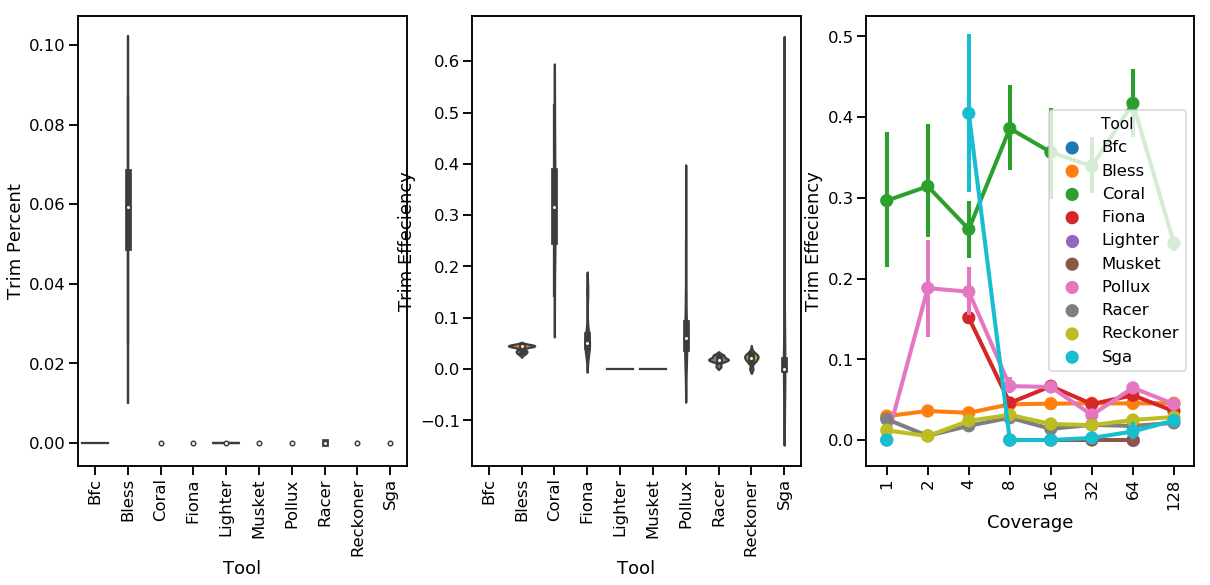

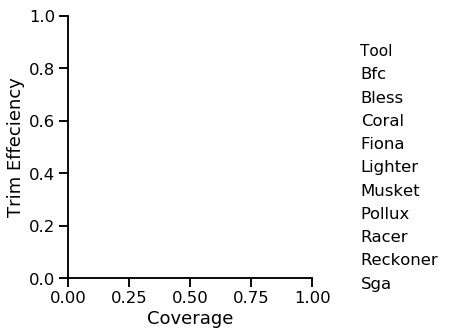

In [58]:

a4_dims = (20, 8.27)
fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
plt.xticks(rotation='vertical')

g = sns.violinplot(ax=axs[0], y="Trim Percent", x="Tool",
             data=data)
g.set_xticklabels(rotation=90, labels=data['Tool'].unique())

g = sns.violinplot(ax=axs[1], y="Trim Effeciency", x="Tool",
             data=data)
g.set_xticklabels(rotation=90, labels =data['Tool'].unique() )

g = sns.catplot(ax=axs[2], x="Coverage", y="Trim Effeciency",
             hue="Tool", kind='point',
             data=data) # no bars 

In [59]:
data_kmer = data.groupby(['Tool','Kmer Size']).mean().groupby('Tool').var()[['Base Sensitivity', 'Base Precision', 'Base Gain', 'Base Accuracy']]
data_cov = data.groupby(['Tool','Coverage']).mean().groupby('Tool').var()[['Base Sensitivity', 'Base Precision', 'Base Gain', 'Base Accuracy']]

new = pd.concat([data_cov, data_kmer], axis=1, sort=False)
new.columns = ['Base Sensitivity Variance (Coverage)', 
              'Base Precision Variance (Coverage)',
              'Base Gain Variance (Coverage)',
              'Base Accuracy Variance (Coverage)',
              'Base Sensitivity Variance (Kmer Size)',
              'Base Precision Variance (Kmer Size)',
              'Base Gain Variance (Kmer Size)',
              'Base Accuracy Variance (Kmer Size)']   

new

,Base Sensitivity Variance (Coverage),Base Precision Variance (Coverage),Base Gain Variance (Coverage),Base Accuracy Variance (Coverage),Base Sensitivity Variance (Kmer Size),Base Precision Variance (Kmer Size),Base Gain Variance (Kmer Size),Base Accuracy Variance (Kmer Size)
Tool,,,,,,,,
Bfc,0.020781,0.000576,0.016869,6.805503e-06,6.678681e-04,5.251259e-05,5.852686e-04,2.336168e-07
Bless,0.040733,0.001151,0.030406,3.833989e-04,1.077334e-04,7.970851e-06,1.629041e-04,7.309852e-07
Coral,0.008805,0.000285,0.006368,2.547602e-06,8.129689e-04,3.755059e-05,5.243345e-04,2.086404e-07
Fiona,0.072396,0.000003,0.068265,2.533311e-05,1.925697e-08,3.546653e-09,2.499422e-08,7.787061e-12
Lighter,0.003815,0.000028,0.003650,1.468137e-06,3.789198e-04,3.821292e-06,3.582905e-04,1.433841e-07
Musket,0.036323,0.001015,0.029464,1.176732e-05,1.151911e-04,1.682445e-05,2.132652e-04,8.682675e-08
Pollux,0.000433,0.000040,0.000442,1.739152e-07,5.173970e-05,2.635466e-05,1.263244e-04,5.181969e-08
Racer,0.028342,0.001104,0.014590,5.562788e-06,9.143033e-13,1.199279e-13,6.741237e-13,2.681688e-16
Reckoner,0.053250,0.004497,0.044952,1.780711e-05,4.010400e-04,4.433587e-05,3.209564e-04,1.245058e-07


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


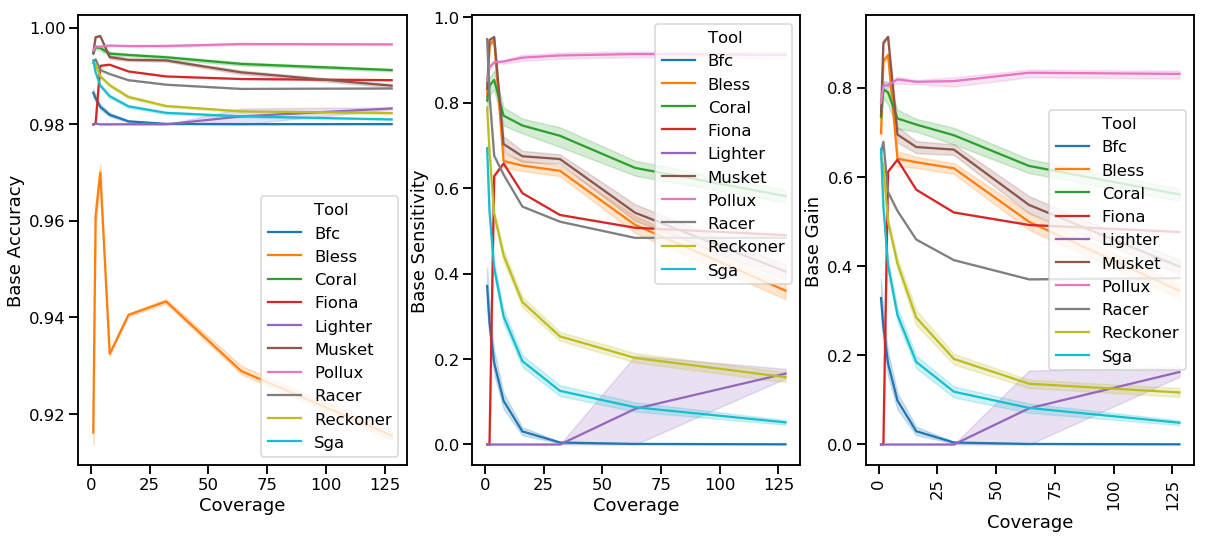

In [55]:
a4_dims = (20, 8.27)
fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
plt.xticks(rotation='vertical')

# g = sns.boxplot(ax=axs[0], y="Trim Percent", x="Tool",
#              data=data)
# g.set_xticklabels(rotation=90, labels=data['Tool'].unique())

# g = sns.boxplot(ax=axs[1], y="Trim Effeciency", x="Tool",
#     z         data=data)
# g.set_xticklabels(rotation=90, labels =data['Tool'].unique() )

# g = sns.catplot(ax=axs[2], x="Coverage", y="Trim Effeciency",
#              hue="Tool", kind='point',
#              data=data) # no bars 

g = sns.lineplot(ax=axs[0], x="Coverage", y="Base Accuracy", data=data, hue='Tool')

g = sns.lineplot(ax=axs[1], x="Coverage", y="Base Sensitivity", data=data, hue='Tool')

g = sns.lineplot(ax=axs[2], x="Coverage", y="Base Gain", data=data, hue='Tool')

